<a href="https://colab.research.google.com/github/guebin/MP2024/blob/main/posts/08wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상 

In [1]:
#{{<video https://youtu.be/playlist?list=PLQqh36zP38-zBs464epBRfxPpNBAKqBMS&si=It99ZTYMQHJkCk6z >}}

# 2. Imports 

In [2]:
#!pip install git+https://github.com/guebin/mp2024pkg.git

In [1]:
import numpy as np
import torch
import mp2024pkg
import transformers
import datasets
import matplotlib.pyplot as plt

/home/cgb3/anaconda3/envs/hf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]


# 3. `numpy`와 `torch`의 비교

`-` 파이썬입문수준의 질문: numpy랑 list의 차이가 뭔가..? 

`-` 기계학습활용수준의 질문: numpy랑 torch의 차이가 뭔가..? 

## A. 공통점 

`-` 기본마인드: numpy에서 가능한건 torch에서도 가능하다고 생각하면 된다. 

`-` 벡터선언 후 브로드캐스팅 

In [3]:
np.array([1,2,3]) + 1

array([2, 3, 4])

In [4]:
torch.tensor([1,2,3]) + 1

tensor([2, 3, 4])

`-` 형태변환 

*torch.tensor의 형태변환*

In [8]:
tsr1 = torch.tensor([1,2,3])
print(
    f"텐서값 = {tsr1}\n"
    f"shape = {tsr1.shape}"
)

텐서값 = tensor([1, 2, 3])
shape = torch.Size([3])


In [11]:
tsr2 = tsr1.reshape(3,1)
print(
    f"텐서값 = {tsr2}\n"
    f"shape = {tsr2.shape}"
)

텐서값 = tensor([[1],
        [2],
        [3]])
shape = torch.Size([3, 1])


In [ ]:
tsr3 = tsr1.reshape(1,3)
print(
    f"텐서값 = {tsr3}\n"
    f"shape = {tsr3.shape}"
)
ensor([1, 2, 3])

텐서값 = tensor([[1, 2, 3]])
shape = torch.Size([1, 3])


*`np.array`의 형태변환*

In [16]:
np.array([1,2,3]).reshape(1,3)

array([[1, 2, 3]])

In [17]:
np.array([1,2,3]).reshape(3,1)

array([[1],
       [2],
       [3]])

`-` 기타함수들도 비슷하게 운용됨 

*`torch.tensor`에서의 stack*

In [18]:
tsr1 = torch.tensor([1,2,3])
tsr2 = torch.tensor([2,3,4])

In [20]:
torch.stack([tsr1,tsr2],axis=0)

tensor([[1, 2, 3],
        [2, 3, 4]])

In [21]:
torch.stack([tsr1,tsr2],axis=1)

tensor([[1, 2],
        [2, 3],
        [3, 4]])

*`np.array`에서의 stack*

In [22]:
arr1 = np.array([1,2,3])
arr2 = np.array([2,3,4])

In [23]:
np.stack([arr1,arr2],axis=0)

array([[1, 2, 3],
       [2, 3, 4]])

In [24]:
np.stack([arr1,arr2],axis=1)

array([[1, 2],
       [2, 3],
       [3, 4]])

## B. 차이점1 -- 기본자료형 

`-` `1/3`와 같은 숫자를 저장할때 넘파이의 경우 기본 data type은 float64임. 

In [26]:
a = np.array(1/3)
a, a.dtype

(array(0.33333333), dtype('float64'))

In [28]:
print(
    f"값: {a}\n"
    f"dtype: {a.dtype}"
)

값: 0.3333333333333333
dtype: float64


`-` 그런데 텐서는 기본 data type이 float32임. (그래서 정확하게 저장되지 않음)

In [29]:
a = torch.tensor(1/3)
a, a.dtype

(tensor(0.3333), torch.float32)

In [30]:
print(
    f"값: {a}\n"
    f"dtype: {a.dtype}"
)

값: 0.3333333432674408
dtype: torch.float32


`-` 억지로 저장할 수는 있음 (그런데 이럴 경우 `dtype` 꼬리표가 붙음)

In [35]:
a = torch.tensor(1/3,dtype=torch.float64)
a, a.dtype

(tensor(0.3333, dtype=torch.float64), torch.float64)

In [36]:
print(
    f"값: {a}\n"
    f"dtype: {a.dtype}"
)

값: 0.3333333333333333
dtype: torch.float64


`-` 자료형 변환시 이러한 기분나쁜 꼬리표가 붙을 수 있음 

`# 예시1`

In [39]:
a = np.array(1/3)
a

array(0.33333333)

In [40]:
torch.tensor(a)

tensor(0.3333, dtype=torch.float64)

`#`

`# 예시2`

In [41]:
a = torch.tensor(1/3)
a

tensor(0.3333)

In [42]:
np.array(a)

array(0.33333334, dtype=float32)

`#`

`-` torch의 경우 float64로 저장되면 모델이 안돌아갈 수 있으니 (메모리를 많이 차지해서) 반드시 dtype을 float32로 바꾸는 습관을 가지면 좋음 

In [47]:
a = np.array(1/3)
tsr = torch.tensor(a)
tsr

tensor(0.3333, dtype=torch.float64)

In [49]:
tsr.float() # 바꾸는방법1

tensor(0.3333)

In [51]:
tsr.to(torch.float32) # 바꾸는방법2

tensor(0.3333)

`-` numpy는 할줄알죠? 

In [52]:
arr = np.array(1/3,dtype=np.float32)
arr

array(0.33333334, dtype=float32)

In [53]:
arr.astype(np.float64)

array(0.33333334)

`-` torch에서 data type을 바꿔주는 메소드는 상당히 유용합니다. (아까 말했듯이 형식을 잘 못 맞추면 코드가 안돌아가요)

In [59]:
a = torch.tensor([1,0,1])
a, a.float()

(tensor([1, 0, 1]), tensor([1., 0., 1.]))

In [60]:
a = torch.tensor([1,0,1])
a, a.bool()

(tensor([1, 0, 1]), tensor([ True, False,  True]))

In [75]:
a = torch.tensor([1.0,0,1])
a, a.long()

(tensor([1., 0., 1.]), tensor([1, 0, 1]))

`-` torch에서 data type 이 중요한이유? 

- 의미상 맞는 코드인데, `dtype`이 안맞으면 실행이 안될 수 있다. 

## C. 차이점2 -- 메소드차이

`-` `torch` 와 `numpy`의 메소드(=자료에 내장된 특수함수)들이 완전히 같지는 않음. 

## D. 차이점3 -- 미분연산지원 ($\star$)

`# 예제1` -- 파이썬을 기본문법을 이용한 미분

`#`

`# 예제2` -- `torch`를 이용한 미분

`#`

`# 예제3`

`#`

`# 예제4`

`#`

`# 예제5`

`#`

## E. 차이점4 -- `cuda` 차이 ($\star$)

`-` `torch`는 `cuda`을 지원해서 좋다.. (그런데 쓰는 입장에선 불편하다)

`-` 구분을 위해서 변수이름을 `*_cpu`, `*_cuda`와 같이정의하자. 

`-` cuda는 cuda끼리, cpu는 cpu끼리 연산가능

# 3. 자료형,차원

`# 예제1` -- 자료형이 안맞으면 **맞는 코드 같은데** 에러가 나는 경우가 많다.

> 코드잘짜는 사람은 이런 형식을 잘 맞추는 듯 합니다..

`#`

`# 예제2` -- IMDB자료에서의 모델을 다시 살펴보자.. 

`-` 전처리

`-` 모델인풋1 -- 차원이 맞지 않음.. (모델은 배치형태 입력을 기대해요)

`-` 모델인풋2 -- 이걸 기대함

`-` 모델인풋3 -- 틀린듯한데 그냥 해주는듯

`-` 모델인풋4 -- 라벨은 int형이어야 한다는 강제가 있었음 

`-` 모델인풋5 -- `input_ids`도 마찬가지로 제약이 있음

`#`

# 4. `cuda` 관리

`# 예제1`

In [84]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0]) 
}

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


---

`-` 원래사용방식 

`-` 모델의 파라메터는 어디에? 

`-` 모델의 파라메터를 cuda로.. 

`-` 아까 계산되던 코드가 거짓말처럼 동작하지 않음 

`-` 다시 모델의 파라메터를 cpu로.. 

`-` 이제 또 계산가능함.. 

`-` 정리해보자.. 

`#`

# 5. `grad` 관리 

`# 예제1` -- 미분꼬리표 제거하고 싶음.. 

`-` `a`에는 꼬리표O, `b`에는 꼬리표X, `a*b`는 `a`로 인한 꼬리표가 유지

In [95]:
a = torch.tensor(3.0,requires_grad=True)
b = torch.tensor([1.0]*10)
a*b

tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], grad_fn=<MulBackward0>)

`-` 꼬리표가 없는 `b`는 `plt.plot`이 동작하지만 꼬리표가 있는 `a*b`는 `plt.plot`이 동작하지 않음 

`-` `a`의 꼬리표를 제거하고 돌리자...

`#`

`# 예제2` -- 미분꼬리표를 제거하는 또다른 기능

`-` 예제1을 아래처럼 실수로 풀었다.

In [99]:
a = torch.tensor(3.0,requires_grad=True)
b = torch.tensor([1.0]*10)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

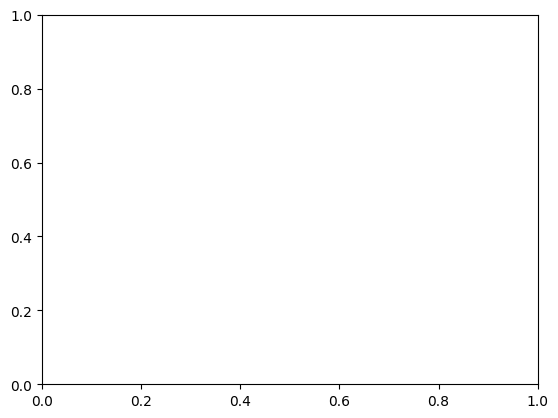

In [100]:
plt.plot(a*b.detach(),'--o')

`-` 아래와 같이 했어야 했는데, 섬세함이 부족했다.. 

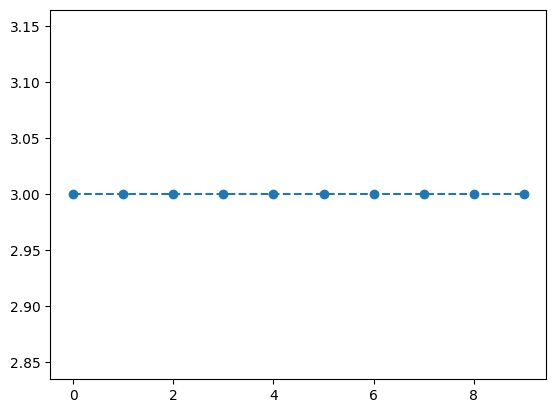

In [114]:
plt.plot((a*b).detach(),'--o')

- 앞으로 섬세하게 코딩하자??

`-` 앞으로 섬세하기 싫다면?? $\to$ `torch.set_grad_enabled()` 이용

*모드확인*

*모드변경*

*다시 모드확인*

*a,b상태 출력*

*계산*

*plot*

*다시모드변경*

*모드변경확인*

*plot -- 이제 못그림* 

`#` 

`# 예제3` 

In [26]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input)

`#`